In [1]:
import numpy as np
import pandas as pd

# Loading Dataset

In [2]:
wpdata = pd.read_csv('/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv')
wpdata.head(3)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing


In [3]:
#Printing data information
wpdata.columns
wpdata.shape
wpdata.info

<bound method DataFrame.info of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19 

In [4]:
#Checking for NULL as well as unique value(s).
wpdata.isna().sum()
wpdata.nunique()

url                11429
length_url           324
length_hostname       83
ip                     2
nb_dots               19
                   ...  
web_traffic         4744
dns_record             2
google_index           2
page_rank             11
status                 2
Length: 89, dtype: int64

# Encoding data

In [5]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wpdata['labels'] = le.fit_transform(wpdata['status'])
wpdata[['status','labels']].head(5)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0


In [6]:
y = wpdata['labels']
x = wpdata.drop(columns = ['url','labels','status'])

print(x.head(2))
print("---"*10)
print(y.head(3))

   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   

   nb_or  nb_eq  ...  empty_title  domain_in_title  domain_with_copyright  \
0      0      0  ...            0                0                      1   
1      0      0  ...            0                1                      0   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                          45          -1   
1                        0                          77        5767   

   web_traffic  dns_record  google_index  page_rank  
0            0           1             1          4  
1            0           0             1          2  

[2 rows x 87 columns]
------------------------------
0    0
1    1
2    1
Name: labels, dtype: int64


# Dataset Creation

In [7]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
xTrain = np.expand_dims(xTrain, axis=-1)
xTest = np.expand_dims(xTest, axis=-1)

In [8]:
print("Shape of xTrain:", xTrain.shape)
print("Shape of xTest:", xTest.shape)
print("Shape of yTrain:", yTrain.shape)
print("Shape of yTest:", xTest.shape)

Shape of xTrain: (9144, 87, 1)
Shape of xTest: (2286, 87, 1)
Shape of yTrain: (9144,)
Shape of yTest: (2286, 87, 1)


# CNN Model

In [9]:
inputSize = xTrain[1].shape

In [71]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Dense

def CNN(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model = CNN(inputSize)
CNN_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 87, 64)            256       
                                                                 
 dropout_80 (Dropout)        (None, 87, 64)            0         
                                                                 
 batch_normalization_55 (Ba  (None, 87, 64)            256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_53 (MaxPooli  (None, 44, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_56 (Conv1D)          (None, 44, 64)            12352     
                                                                 
 dropout_81 (Dropout)        (None, 44, 64)          

In [72]:
import tensorflow as tf

CNN_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5', verbose=1, save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=30, verbose=1)]
modelResutls = CNN_model.fit(xTrain, yTrain, validation_split=0.2, batch_size=48, epochs=200, callbacks=callbacks)

Epoch 1/200
153/153 [==============================] - ETA: 0s - loss: 0.7238 - accuracy: 0.6704
Epoch 1: val_loss improved from inf to 0.78999, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 7s 14ms/step - loss: 0.7238 - accuracy: 0.6704 - val_loss: 0.7900 - val_accuracy: 0.5161
Epoch 2/200
 13/153 [=>............................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7516

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


151/153 [============================>.] - ETA: 0s - loss: 0.4821 - accuracy: 0.7806
Epoch 2: val_loss did not improve from 0.78999
153/153 [==============================] - 2s 10ms/step - loss: 0.4822 - accuracy: 0.7806 - val_loss: 1.1877 - val_accuracy: 0.5194
Epoch 3/200
150/153 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.8096
Epoch 3: val_loss did not improve from 0.78999
153/153 [==============================] - 2s 10ms/step - loss: 0.4261 - accuracy: 0.8109 - val_loss: 0.8029 - val_accuracy: 0.5216
Epoch 4/200
151/153 [============================>.] - ETA: 0s - loss: 0.3912 - accuracy: 0.8288
Epoch 4: val_loss did not improve from 0.78999
153/153 [==============================] - 2s 10ms/step - loss: 0.3913 - accuracy: 0.8290 - val_loss: 0.9657 - val_accuracy: 0.5495
Epoch 5/200
149/153 [============================>.] - ETA: 0s - loss: 0.3915 - accuracy: 0.8269
Epoch 5: val_loss improved from 0.78999 to 0.70089, saving model to CNN_MODEL_ON_FEATUR

# Confusion Matrix, ROC curve and other metrics for CNN model

72/72 [==============================] - 0s 3ms/step


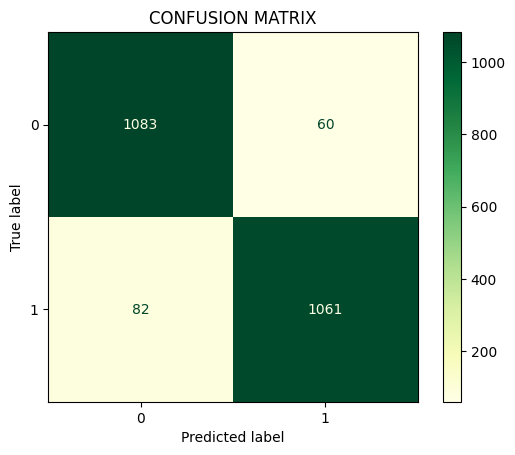

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

yPred = CNN_model.predict(xTest)
yPred = yPred>0.5
cm = confusion_matrix(yTest, yPred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisplay.plot(cmap = plt.cm.YlGn)
plt.title('CONFUSION MATRIX')
plt.show()

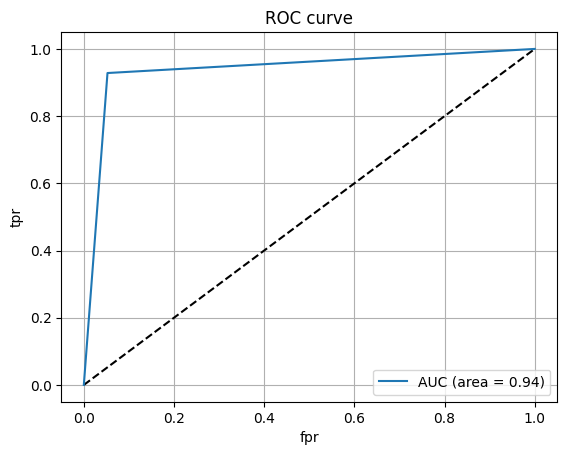

In [74]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(yTest, yPred)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [75]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPred, target_names = ['Legitimate', 'Phishing']))

              precision    recall  f1-score   support

  Legitimate       0.93      0.95      0.94      1143
    Phishing       0.95      0.93      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



# CNN-LSTM Model

In [81]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Dense

def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model = CNN_LSTM(inputSize)
CNN_LSTM_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_65 (Conv1D)          (None, 87, 16)            64        
                                                                 
 dropout_95 (Dropout)        (None, 87, 16)            0         
                                                                 
 batch_normalization_65 (Ba  (None, 87, 16)            64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_62 (MaxPooli  (None, 44, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_66 (Conv1D)          (None, 44, 32)            1568      
                                                                 
 dropout_96 (Dropout)        (None, 44, 32)          

In [82]:
CNN_LSTM_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5', verbose=1, save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=30, verbose=1)]
CNN_LSTM_results = CNN_LSTM_model.fit(xTrain, yTrain, validation_split=0.2, batch_size=256, epochs=200, callbacks=callbacks)

Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 0.6573 - accuracy: 0.6056
Epoch 1: val_loss improved from inf to 0.68704, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
29/29 [==============================] - 7s 45ms/step - loss: 0.6573 - accuracy: 0.6056 - val_loss: 0.6870 - val_accuracy: 0.6364
Epoch 2/200
 6/29 [=====>........................] - ETA: 0s - loss: 0.5801 - accuracy: 0.7083

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/29 [=========================>....] - ETA: 0s - loss: 0.5486 - accuracy: 0.7273
Epoch 2: val_loss improved from 0.68704 to 0.68273, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
29/29 [==============================] - 0s 16ms/step - loss: 0.5480 - accuracy: 0.7288 - val_loss: 0.6827 - val_accuracy: 0.5183
Epoch 3/200
26/29 [=========================>....] - ETA: 0s - loss: 0.4851 - accuracy: 0.7674
Epoch 3: val_loss did not improve from 0.68273
29/29 [==============================] - 0s 12ms/step - loss: 0.4889 - accuracy: 0.7657 - val_loss: 0.6930 - val_accuracy: 0.5079
Epoch 4/200
26/29 [=========================>....] - ETA: 0s - loss: 0.4608 - accuracy: 0.7859
Epoch 4: val_loss did not improve from 0.68273
29/29 [==============================] - 0s 12ms/step - loss: 0.4594 - accuracy: 0.7880 - val_loss: 0.6862 - val_accuracy: 0.5189
Epoch 5/200
26/29 [=========================>....] - ETA: 0s - loss: 0.4460 - accuracy: 0.7975
Epoch 5: val_loss did not improve from 0.

# Confusion Matrix, ROC curve and other metrics for CNN-LSTM model

72/72 [==============================] - 1s 3ms/step


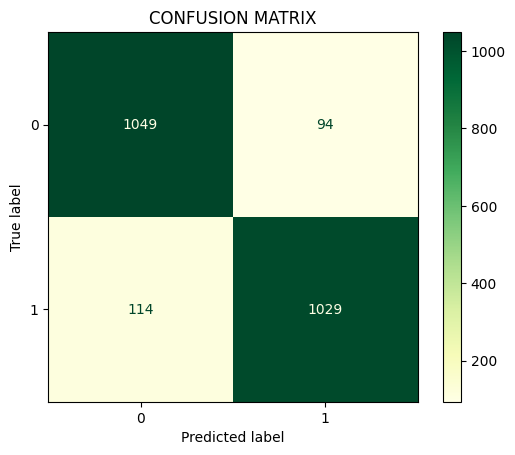

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

yPred = CNN_LSTM_model.predict(xTest)
yPred = yPred>0.5
cm = confusion_matrix(yTest, yPred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisplay.plot(cmap = plt.cm.YlGn)
plt.title('CONFUSION MATRIX')
plt.show()

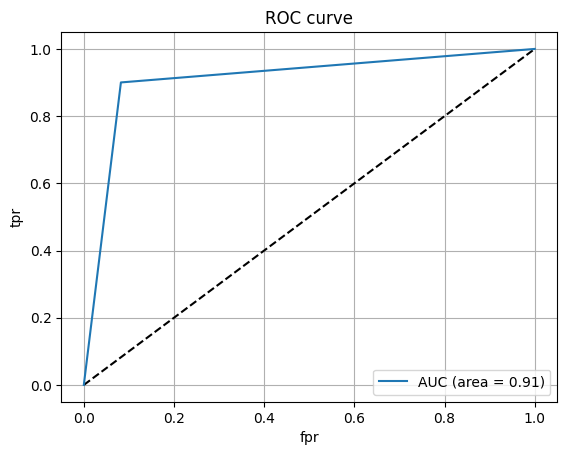

In [84]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(yTest, yPred)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [85]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPred, target_names = ['Legitimate', 'Phishing']))

              precision    recall  f1-score   support

  Legitimate       0.90      0.92      0.91      1143
    Phishing       0.92      0.90      0.91      1143

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286

